# Google Play Store Apps Exploratory Data Analysis (EDA)

## Introduction
Google Play Store, formerly known as Android Market, is Google's digital distribution platform. It offers a wide range of content including apps, books, magazines, music, movies, and TV programs. This platform serves as the official app store for Android devices that are 'Google certified.' Users can download applications from the store, which can be either paid or free. With the exponential growth of Android devices and the ever-expanding app ecosystem, analyzing the data from Google Play Store is crucial for gaining valuable insights. This data analysis can provide a deeper understanding of user preferences, popular app categories, pricing strategies, and trends within the Android app market. It enables developers, marketers, and businesses to make informed decisions, optimize their offerings, and cater to the diverse needs of Android users effectively.
The dataset that is going to be used is 'Google Play Store Apps' from Kaggle. It contains 10k of web scraped Play Store apps data for analysing the Android market. The tools that are going to be used for this EDA would be numpy, pandas, matplotlib and seaborn which I have learnt from [the course](http://zerotopandas.com). 

In [72]:
project_name = "google-play-store-apps-eda"

In [73]:
!pip install jovian --upgrade -q

In [74]:
import jovian

In [77]:
"jovian.commit(project_name = 'google-play-store-apps-eda')"

"jovian.commit(project_name = 'google-play-store-apps-eda')"

## Data Preparation and Cleaning

In this section, we will be loading the Google Store Apps data stored in csv using pandas which is a fast and powerful python library for data analysis and easy data manipulation in pandas DataFrame object. It is usually used for working with tabular data (e.g data in spreadsheet) in various formats such as CSV, Excel spreadsheets, HTML tables, JSON etc. We will then perform some data preparation and also cleaning on it.

In [78]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# allow matplotlib to plot inline with frontends like Jupyter

In [79]:
# look at the files in the dataset
import os

file_path = "E:\\python course\\Play store analysis\\googleplaystore.csv"

if os.path.exists(file_path):
    print("File exists")
else:
    print("File does not exist")


File exists


In [80]:
# load the apps and reviews data into pandas dataframe
apps_df = pd.read_csv("E:\\python course\\Play store analysis\\googleplaystore.csv")

In [81]:
# look at the first 10 records in the apps dataframe
apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [82]:
# look at the random 10 records in the apps dataframe
apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5176,Mitchell AH,MEDICAL,NaN,0,29M,50+,Free,0,Everyone,Medical,"May 23, 2018",300000.1.08,4.0.3 and up
631,Friend Find: free chat + flirt dating app,DATING,NaN,23,11M,100+,Free,0,Mature 17+,Dating,"July 31, 2018",1.0,4.4 and up
2292,"End Anxiety Pro - Stress, Panic Attack Help",MEDICAL,4.2,33,53M,"1,000+",Paid,$3.99,Everyone,Medical,"May 8, 2018",2.29,4.2 and up
2925,Camera for Android,PHOTOGRAPHY,4.2,240475,9.5M,"10,000,000+",Free,0,Everyone,Photography,"November 22, 2017",3.8,4.0 and up
2750,"Carousell: Snap-Sell, Chat-Buy",SHOPPING,4.3,125783,Varies with device,"10,000,000+",Free,0,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device
7930,MYCU TX Mobile Banking,FINANCE,3.0,4,Varies with device,100+,Free,0,Everyone,Finance,"August 1, 2018",1.0.2,Varies with device
5458,AP Planner,FAMILY,2.9,45,1.3M,"5,000+",Free,0,Everyone,Education,"August 3, 2015",1.1,2.1 and up
3814,NYTimes - Latest News,NEWS_AND_MAGAZINES,3.9,63647,23M,"10,000,000+",Free,0,Everyone 10+,News & Magazines,"August 1, 2018",6.19.5,4.4 and up
7473,CK-12 Physics Simulations,FAMILY,4.1,30,24M,"5,000+",Free,0,Everyone,Education;Education,"April 18, 2018",1.0.7,4.1 and up
8002,Saiyan Of CW,FAMILY,3.8,5,1.1M,500+,Free,0,Everyone,Role Playing,"July 31, 2018",2.0.10,4.0.3 and up


## Description of App Dataset columns
1. App : The name of the app
2. Category : The category of the app
3. Rating : The rating of the app in the Play Store
4. Reviews : The number of reviews of the app
5. Size : The size of the app
6. Install : The number of installs of the app
7. Type : The type of the app (Free/Paid)
8. The price of the app (0 if it is Free)
9. Content Rating :The appropiate target audience of the app
10. Genres: The genre of the app
11. Last Updated : The date when the app was last updated
12. Current Ver : The current version of the app
13. Android Ver : The minimum Android version required to run the app

In [83]:
# type of Category
apps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [84]:
# type of Type
apps_df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [85]:
# type of Content Rating
apps_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [86]:
# type of Genres
apps_df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [87]:
# look that the info of the dataframe
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


By diagnosing the data frame, we know that:
1. There are 13 columns of properties with 10841 rows of data.
2. Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'
3. Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
4. Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
5. Values of column 'Price' are strings representing price with symbol '$'.

Hence, we will need to do some data cleaning.

### Some Data Cleaning

In [88]:
# 1) clean the 'Reviews' data and change the type 'object' to 'float'
reviews = [i for i in apps_df['Reviews']]

def clean_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for review in reviews_list:
        if 'M' in review:
            review = review.replace('M', '')
            review = float(review) * 1000000  # 1M = 1,000,000
        cleaned_data.append(review)
    return cleaned_data

apps_df['Reviews'] = clean_reviews(reviews)
apps_df['Reviews'] = apps_df['Reviews'].astype(float)

In [89]:
# 2) clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = apps_df[apps_df['Size'] == '1,000+'].index
apps_df.drop(axis=0, inplace=True, index=index)

sizes = [i for i in apps_df['Size']]

def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

apps_df['Size'] = clean_sizes(sizes)
apps_df['Size'] = apps_df['Size'].astype(float)

In [90]:
# 3) clean the 'Installs' data and change the type 'object' to 'float'
installs = [i for i in apps_df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
apps_df['Installs'] = clean_installs(installs)
apps_df['Installs'] = apps_df['Installs'].astype(float)

In [91]:
# 4) clean the 'Price' data and change the type 'object' to 'float'
prices = [i for i in apps_df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

apps_df['Price'] = clean_prices(prices)
apps_df['Price'] = apps_df['Price'].astype(float)

In [92]:
# look at the random 10 records in the apps dataframe to verify the cleaned columns
apps_df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5880,NB|AZ Mobile Banking,FINANCE,4.0,463.0,13.0,10000.0,Free,0.0,Everyone,Finance,"April 5, 2018",4.2.31,4.2 and up
2356,Free Blood Pressure,MEDICAL,NaN,7.0,5.7,5000.0,Free,0.0,Everyone,Medical,"October 13, 2016",3.0.0,4.0.3 and up
8303,Love Collage - Photo Editor,PHOTOGRAPHY,4.3,251686.0,31.0,10000000.0,Free,0.0,Everyone,Photography,"July 28, 2017",2.3.8.6,4.1 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098.0,18.0,1000000.0,Free,0.0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
9610,Instabridge - Free WiFi Passwords and Hotspots,TOOLS,4.4,211308.0,0.0,10000000.0,Free,0.0,Everyone,Tools,"August 2, 2018",Varies with device,4.1 and up
375,AT&T Visual Voicemail,COMMUNICATION,3.7,13761.0,0.0,10000000.0,Free,0.0,Everyone,Communication,"June 27, 2018",Varies with device,Varies with device
927,Lifetime - Watch Full Episodes & Original Movies,ENTERTAINMENT,4.0,35928.0,19.0,1000000.0,Free,0.0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up
9507,Alex Fuel Calculator for EK,TOOLS,4.9,19.0,3.3,500.0,Free,0.0,Everyone,Tools,"June 15, 2018",1.8,2.1 and up
7766,CR & CoC Private Server - Clash Barbarians PRO,FAMILY,4.6,167974.0,5.0,500000.0,Free,0.0,Everyone,Entertainment,"July 27, 2018",Gratis,4.0.3 and up
909,DramaFever: Stream Asian Drama Shows & Movies,ENTERTAINMENT,4.2,155234.0,22.0,1000000.0,Free,0.0,Teen,Entertainment,"August 1, 2018",01.01.66,4.4 and up


In [93]:
# check on null values
apps_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Here, we realized that there are 1474 rows having null values under column 'Rating'. 
Hence, we decided to replace the null values with median of overall 'Rating' values.

In [94]:
def replace_with_median(series):
    """
    Given a series, replace the rows with null values 
    with median values
    """
    return series.fillna(series.median())

apps_df['Rating'] = apps_df['Rating'].transform(replace_with_median)
apps_df['Rating'] = apps_df['Rating'].astype(float)

In [95]:
# remove the record where 'Type' is having null value
index = apps_df[apps_df['Type'].isna()].index
apps_df.drop(axis=0, inplace=True, index=index)

In [96]:
# check on null values
apps_df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [97]:
# grouping the data starting with App and Reviews
apps_df = apps_df.groupby(['App', 'Reviews', 'Category', 'Rating', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 
                           'Last Updated', 'Current Ver', 'Android Ver'], as_index=False)
# reassign Installs values with their mean
apps_df = apps_df['Installs'].mean()
# sort the dataframe by Reviews descendingly
apps_df.sort_values(by='Reviews', ascending=False, inplace=True)
# drop duplicate rows based on App 
apps_df.drop_duplicates(subset=['App'], inplace=True)
apps_df

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
9661,WhatsApp Messenger,69119316.0,COMMUNICATION,4.4,0.0,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5731,Instagram,66577446.0,SOCIAL,4.5,0.0,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,1.000000e+09
6546,Messenger – Text and Video Chat for Free,56646578.0,COMMUNICATION,4.0,0.0,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,1.000000e+09
2701,Clash of Clans,44893888.0,GAME,4.6,98.0,Free,0.0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,FG Autumn Photo Puzzle,0.0,FAMILY,4.3,4.6,Free,0.0,Everyone,Puzzle,"August 23, 2017",1.0,4.0 and up,1.000000e+01
4369,FE Other Disciplines Engineering Exam Prep,0.0,FAMILY,4.3,21.0,Free,0.0,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1.000000e+02
9033,Thyroid Nodules,0.0,MEDICAL,4.3,20.0,Free,0.0,Everyone,Medical,"July 14, 2018",1.0,4.3 and up,1.000000e+01
185,ACCEPT CE MARKING,0.0,PRODUCTIVITY,4.3,30.0,Free,0.0,Everyone,Productivity,"June 28, 2018",1.0,4.1 and up,1.000000e+01


In [98]:
# check on statistical information of the dataframe
apps_df.describe()

,Reviews,Rating,Size,Price,Installs
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9.648000e+03
mean,2.170487e+05,4.192485,17.820208,1.098122,7.806898e+06
std,1.832460e+06,0.496210,21.503151,16.861193,5.379975e+07
min,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00
25%,2.500000e+01,4.000000,2.900000,0.000000,1.000000e+03
50%,9.745000e+02,4.300000,9.200000,0.000000,1.000000e+05
75%,2.949750e+04,4.500000,25.000000,0.000000,1.000000e+06
max,7.815831e+07,5.000000,100.000000,400.000000,1.000000e+09


In [99]:
import jovian
"jovian.commit(project_name = 'google-play-store-eda')"

"jovian.commit(project_name = 'google-play-store-eda')"

## Exploratory Analysis and Visualization

### Category

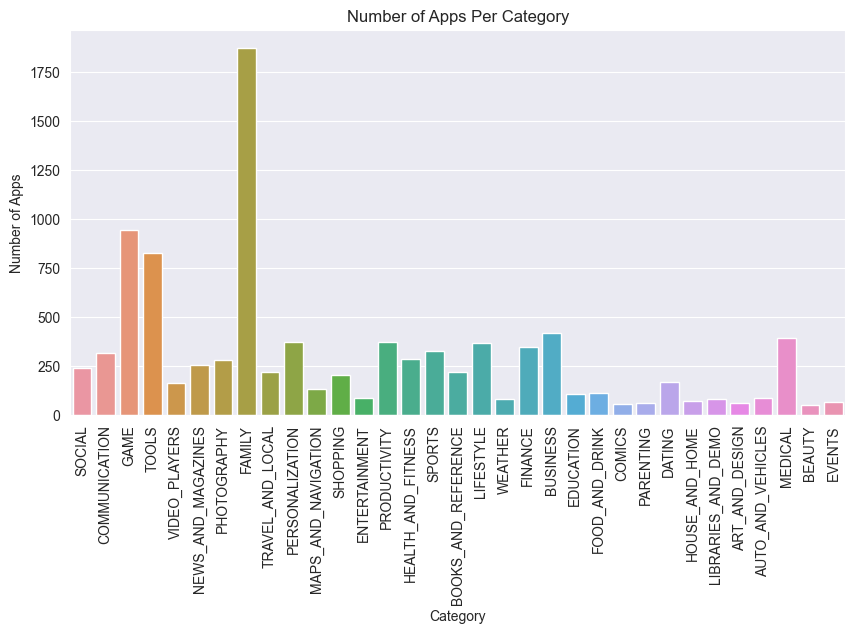

In [100]:
# get the number of apps for each category
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.countplot(x='Category', data=apps_df)
plt.title('Number of Apps Per Category')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this plotting we know that most of the apps in the play store are from the categories of 'Family', 'Game' and also 'Tools.

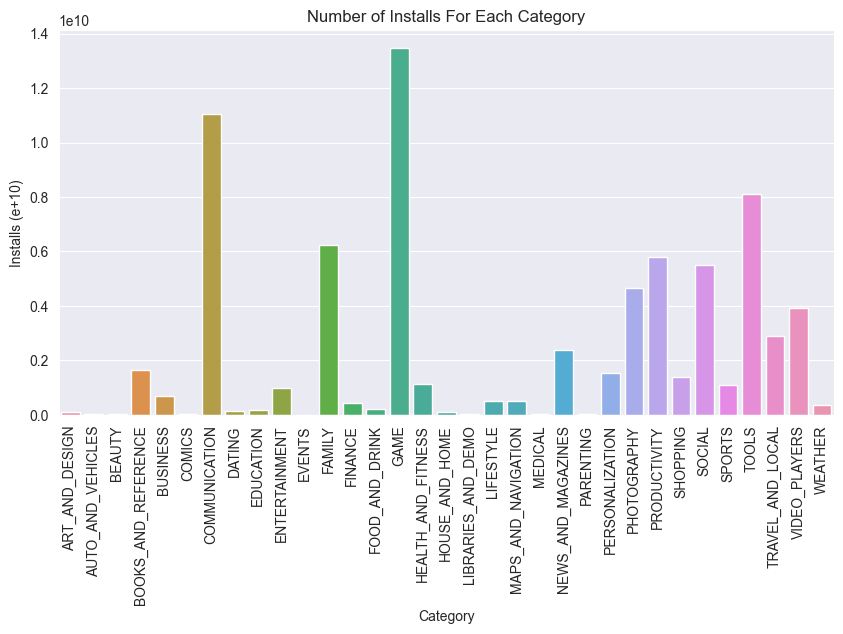

In [101]:
# get the number of installs for each category
categories = apps_df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index()  # to convert groupby object into dataframe

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

### Rating

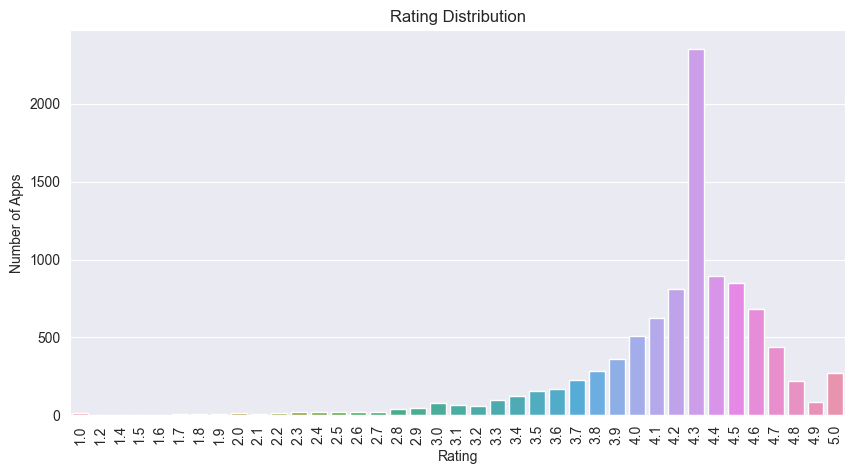

In [102]:
# show the distribution of rating
plt.figure(figsize=(10, 5))
sns.countplot(x='Rating', data=apps_df)
plt.title('Rating Distribution')
plt.xticks(rotation=90)
plt.ylabel('Number of Apps')
plt.show()

From this distribution plotting, it implies that most of the apps in the Play Store are having rating higher than 4 or in the range of 4 to 4.7. 

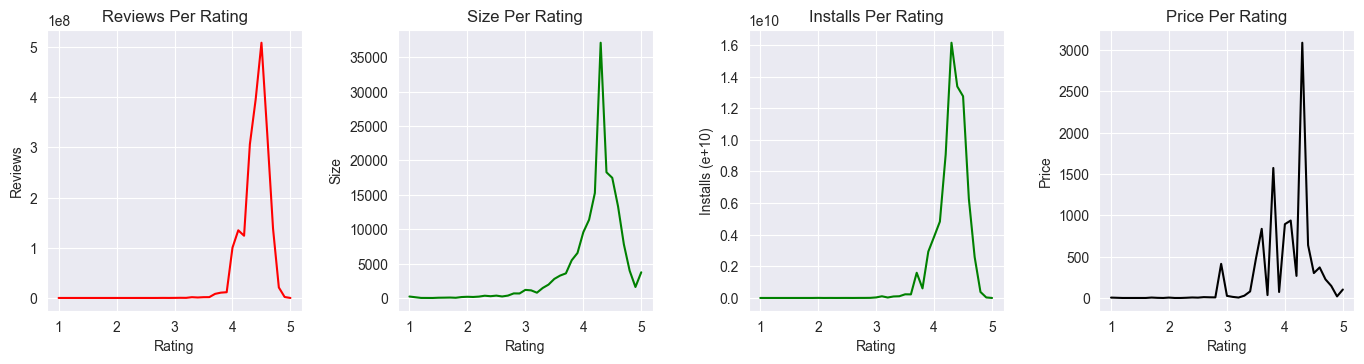

In [103]:
# plot the graphs of reviews, size, installs and price per rating
rating_df = apps_df.groupby('Rating').sum().reset_index()

fig, axes = plt.subplots(1, 4, figsize=(14, 4))

axes[0].plot(rating_df['Rating'], rating_df['Reviews'], 'r')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Reviews')
axes[0].set_title('Reviews Per Rating')

axes[1].plot(rating_df['Rating'], rating_df['Size'], 'g')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Size')
axes[1].set_title('Size Per Rating')

axes[2].plot(rating_df['Rating'], rating_df['Installs'], 'g')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Installs (e+10)')
axes[2].set_title('Installs Per Rating')

axes[3].plot(rating_df['Rating'], rating_df['Price'], 'k')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Price')
axes[3].set_title('Price Per Rating')

plt.tight_layout(pad=2)
plt.show()

From the above plottings, we can imply that most of the apps with higher rating range of 4.0 - 4.7 are having high amount of reviews, size, and installs. In terms of price, it doesn't reflect a direct relationship with rating, as we could see a fluctuation in term of pricing even at the range of high rating. 

### Application Type

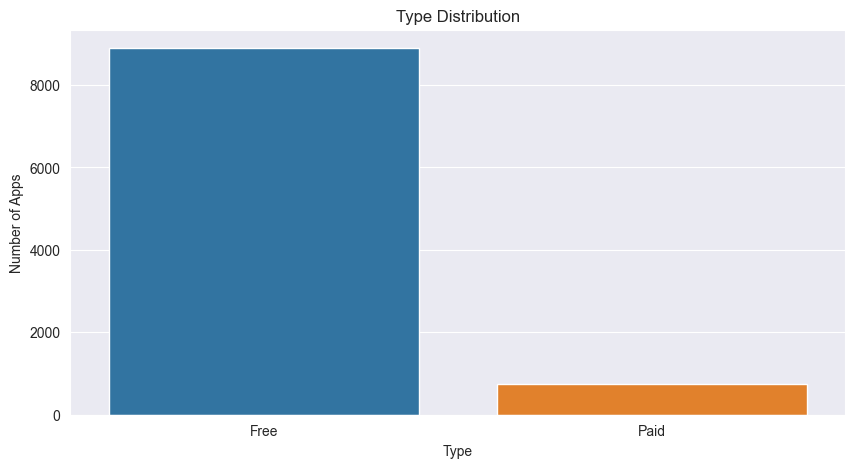

In [104]:
# application type distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=apps_df['Type'].value_counts().index, y=apps_df['Type'].value_counts())
plt.title('Type Distribution')
plt.ylabel('Number of Apps')
plt.xlabel('Type')
plt.show()


From the plot we can imply that majority of the apps in the Play Store are Free apps.

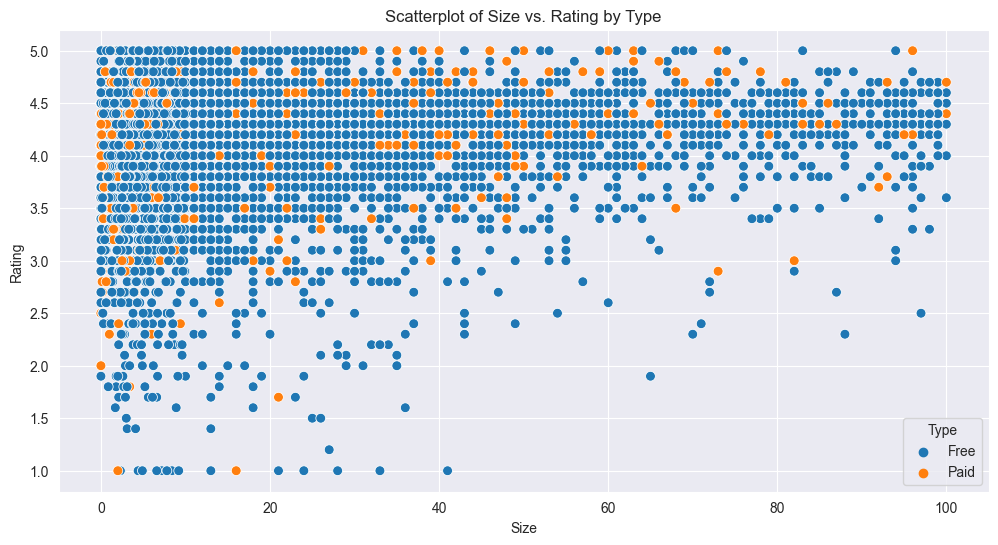

In [105]:
# show the distribution of apps in term of their rating, size and type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Rating', hue='Type', data=apps_df, s=50)
plt.title('Scatterplot of Size vs. Rating by Type')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()


From this scatter plot, we can imply that majority of the free apps are small in size and having high rating. While for paid apps, we have quite equal distribution in term on size and rating.

In [106]:
# correlation
# Exclude non-numeric columns from correlation calculation
numeric_columns = apps_df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


           Reviews    Rating      Size     Price  Installs
Reviews   1.000000  0.050280  0.037812 -0.007597  0.625051
Rating    0.050280  1.000000  0.027338 -0.018585  0.034393
Size      0.037812  0.027338  1.000000 -0.015033 -0.007803
Price    -0.007597 -0.018585 -0.015033  1.000000 -0.009418
Installs  0.625051  0.034393 -0.007803 -0.009418  1.000000


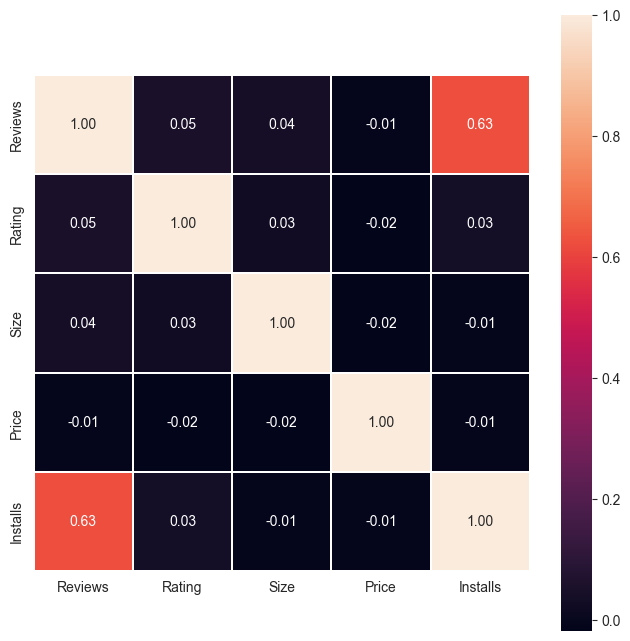

In [107]:
# Select only numeric columns
numeric_columns = apps_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation_matrix, ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()


In [110]:
import jovian
"jovian.commit(project_name = 'google-play-store-apps-eda')"

"jovian.commit(project_name = 'google-play-store-apps-eda')"

## Asking and Answering Questions


In [111]:
# 1. What is the top 5 apps on the basis of installs?
df = apps_df.sort_values(by=['Installs'], ascending=False)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4534,Facebook,78158306.0,SOCIAL,4.1,0.0,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,1.000000e+09
5211,Google Photos,10859051.0,PHOTOGRAPHY,4.5,0.0,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,1.000000e+09
5229,Google+,4831125.0,SOCIAL,4.2,0.0,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device,1.000000e+09
5122,Gmail,4604483.0,COMMUNICATION,4.3,0.0,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,1.000000e+09
5221,Google Street View,2129707.0,TRAVEL_AND_LOCAL,4.2,0.0,Free,0.0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device,1.000000e+09


In [112]:
print(f'The 5 apps that have the most number of installs are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of installs are: Facebook, Google Photos, Google+, Gmail, Google Street View


In [113]:
# 2. What is the top 5 reviewed apps?
df = apps_df.groupby(by=['App', 'Category', 'Rating'])[['Reviews']].sum().reset_index()
df = df.sort_values(by=['Reviews'], ascending=False)
df.head(5)

,App,Category,Rating,Reviews
4324,Facebook,SOCIAL,4.1,78158306.0
9031,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0
5395,Instagram,SOCIAL,4.5,66577446.0
6158,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0
2562,Clash of Clans,GAME,4.6,44893888.0


In [114]:
print(f'The 5 apps that have the most number of total reviews are: {", ".join(df["App"].head(5))}')

The 5 apps that have the most number of total reviews are: Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans


In [115]:
# 3. What is the top 5 expensive apps?
df = apps_df.sort_values(by=['Price'], ascending=False)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
5653,I'm Rich - Trump Edition,275.0,LIFESTYLE,3.6,7.3,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,10000.0
5654,I'm Rich/Eu sou Rico/أنا غني/我很有錢,0.0,LIFESTYLE,4.3,40.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up,0.0
5643,I am Rich Plus,856.0,FAMILY,4.0,8.7,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up,10000.0
5648,I am rich (Most expensive app),129.0,FINANCE,4.1,2.7,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up,1000.0
5627,I Am Rich Premium,1867.0,FINANCE,4.1,4.7,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,50000.0


In [116]:
print(f'The top 5 most expensive apps in the store are: {", ".join(df["App"].head(5))}')

The top 5 most expensive apps in the store are: I'm Rich - Trump Edition, I'm Rich/Eu sou Rico/أنا غني/我很有錢, I am Rich Plus, I am rich (Most expensive app), I Am Rich Premium


In [117]:
# 4. What is the top 3 most installed apps in Game category?
df = apps_df[apps_df['Category'] == 'GAME']
df = df.sort_values(by=['Installs'], ascending=False)
df.head(3)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
8619,Subway Surfers,27725352.0,GAME,4.5,76.0,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,1.000000e+09
2480,Candy Crush Saga,22430188.0,GAME,4.4,74.0,Free,0.0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,5.000000e+08
6849,My Talking Tom,14892469.0,GAME,4.5,0.0,Free,0.0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up,5.000000e+08


In [118]:
print(f'The top 3 most expensive apps in the GAME category are: {", ".join(df["App"].head(3))}')

The top 3 most expensive apps in the GAME category are: Subway Surfers, Candy Crush Saga, My Talking Tom


In [119]:
# 5. Which 5 apps from the 'FAMILY' category are having the lowest rating?
df = apps_df[apps_df['Category'] == 'FAMILY']
df = df.sort_values(by=['Rating'], ascending=True)
df.head(5)

,App,Reviews,Category,Rating,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs
4366,FE Mechanical Engineering Prep,2.0,FAMILY,1.0,21.0,Free,0.00,Everyone,Education,"July 27, 2018",5.33.3669,5.0 and up,1000.0
9187,Truck Driving Test Class 3 BC,1.0,FAMILY,1.0,2.0,Paid,1.49,Everyone,Education,"April 9, 2012",1.0,2.1 and up,50.0
8494,Speech Therapy: F,1.0,FAMILY,1.0,16.0,Paid,2.99,Everyone,Education,"October 7, 2016",1.0,2.3.3 and up,10.0
168,AC REMOTE UNIVERSAL-PRO,402.0,FAMILY,1.6,1.7,Free,0.00,Everyone,Entertainment,"December 11, 2015",1.0,2.2 and up,100000.0
1106,BG TV App,6.0,FAMILY,1.7,2.9,Free,0.00,Everyone,Entertainment,"December 21, 2017",1.0,4.1 and up,100.0


In [120]:
print(f'The 5 apps from the FAMILY category having the lowest rating are: {", ".join(df["App"].head(5))}')

The 5 apps from the FAMILY category having the lowest rating are: FE Mechanical Engineering Prep, Truck Driving Test Class 3 BC, Speech Therapy: F, AC REMOTE UNIVERSAL-PRO, BG TV App


In [122]:
import jovian
"jovian.commit(project_name = 'google-play-store-apps-eda')"

"jovian.commit(project_name = 'google-play-store-apps-eda')"

## Inferences and Conclusion

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, most of the trending apps (in terms of users' installs) are from the categories like GAME, COMMUNICATION, and TOOL even though the amount of available apps from these categories are twice as much lesser than the category FAMILY. The trending of these apps are most probably due to their nature of being able to entertain or assist the user. Besides, it also shows a good trend where we can see that developers from these categories are focusing on the quality instead of the quantity of the apps.

Other than that, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs. There are some spikes in term of size and price but it shouldn't reflect that apps with high rating are mostly big in size and pricy as by looking at the graphs they are most probably are due to some minority. Futhermore, most of the apps that are having high amount of reviews are from the categories of SOCIAL, COMMUNICATION and GAME like Facebook, WhatsApp Messenger, Instagram, Messenger – Text and Video Chat for Free, Clash of Clans etc. 

Eventhough apps from the categories like GAME, SOCIAL, COMMUNICATION and TOOL of having the highest amount of installs, rating and reviews are reflecting the current trend of Android users, they are not even appearing as category in the top 5 most expensive apps in the store (which are mostly from FINANCE and LIFESTYLE). As a conclsuion, we learnt that the current trend in the Android market are mostly from these categories which either assisting, communicating or entertaining apps. 

In [124]:
import jovian
"jovian.commit(project_name = 'google-play-store-apps-eda')"

"jovian.commit(project_name = 'google-play-store-apps-eda')"